# Understanding what causes recent mass layoffs on a globe

#### Authors:      Purnima Kumari, Shreya Saha, Ya Huei Huang, Tian-An Wong

#### Date created: June 2nd, 2023

#### Place:        May Data Bootcamp at The Erdos Institute



Abstract: We downloaded the mass layoffs dataset from Kaggle.com. The mass layoffs was tracked in terms of time, country origin, industry type, company name, company stage, and fund raised after the mass laidoff event. This dataset would provide an insight to a global mass layoff phenomenon.

The details of the dataset as followed:

Company: Name of the company

Location: Location of the company layoff

Industry: Type of Industry of the company

Total_Laid_Off: Number of employees laid off

Percentage_Laid_Off: Percentage of employees laid off

Date: Date of layoff

Stage: Stage of Funding

Country: Country of the company

Funds_Raised: Fund raised by the company in Millions USD $

## What we will explore in this jupyter notebook: 

We will:
- Clean the mass layoff data.
- Present a Exploratory Data Analysis (EDA) for mass layoff that ranges from 2020 Jan to 2023 April.

## What we will have three tasks:

We will:
- in Task 1: Test model 1: time series of mass layoff.
- in Task 2: Test model 2: linear regression model.
- in Task 3: Test model 3: decision tree model.

## What we will pursue in the future:

We plan to:
- Consider more variables in our linear regression model.
- Collect stock market and country GDP data. 
- Build a user-friendly plateform for predicting a mass layoff. 

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import plotly.express as px

print(pd.__version__)

1.5.3


# Load mass layoff data

In [149]:
data = pd.read_csv("layoffs.csv")

In [150]:
data.shape

(2545, 9)

In [151]:
type(data)

pandas.core.frame.DataFrame

Note: 
we believe that funds raised is defined as a profit or funding raising of a company after a layoff event

We can actually pin down the list of employees at the mass layoff event: np.where( (data['date']=='2022-11-09') & (data['company']=='Meta') )

In [152]:
data.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1746.000000,1694.000000,2297.000000
mean,256.022337,0.260577,814.143794
std,841.557354,0.258415,5448.104463
min,3.000000,0.000000,0.000000
25%,38.000000,0.100000,50.000000
50%,80.000000,0.170000,156.000000
75%,180.000000,0.300000,442.000000
max,12000.000000,1.000000,121900.000000


Year wise average total laid off and funds raised

In [153]:
data.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,N26,Berlin,Finance,71.0,0.04,2023-04-28,Series E,United States,1700.0
1,Providoor,Melbourne,Food,NaN,1.00,2023-04-28,Unknown,Australia,NaN
2,Dropbox,SF Bay Area,Other,500.0,0.16,2023-04-27,Post-IPO,United States,1700.0
3,Vroom,New York City,Transportation,120.0,0.11,2023-04-27,Post-IPO,United States,1300.0
4,Greenhouse,New York City,Recruiting,100.0,0.12,2023-04-27,Private Equity,United States,110.0


# Clean data - Remove Null Values, and Duplicated Items

In [154]:
#Drop the rows where at least one element in a row is missing
no_null_data = data.dropna()

#Drop Duplicates
df = no_null_data.drop_duplicates()
print(df.shape)
df.head()
df.info()

(1165, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 2541
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1165 non-null   object 
 1   location             1165 non-null   object 
 2   industry             1165 non-null   object 
 3   total_laid_off       1165 non-null   float64
 4   percentage_laid_off  1165 non-null   float64
 5   date                 1165 non-null   object 
 6   stage                1165 non-null   object 
 7   country              1165 non-null   object 
 8   funds_raised         1165 non-null   float64
dtypes: float64(3), object(6)
memory usage: 91.0+ KB


# Exploratory Data Analysis

In [155]:
# Fixing Date's datatype
df_corr =df
df_corr['date'] = pd.to_datetime(df['date'])

# Adding a year column 
df_corr["year"] = df['date'].dt.year
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 2541
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              1165 non-null   object        
 1   location             1165 non-null   object        
 2   industry             1165 non-null   object        
 3   total_laid_off       1165 non-null   float64       
 4   percentage_laid_off  1165 non-null   float64       
 5   date                 1165 non-null   datetime64[ns]
 6   stage                1165 non-null   object        
 7   country              1165 non-null   object        
 8   funds_raised         1165 non-null   float64       
 9   year                 1165 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 100.1+ KB


/tmp/ipykernel_11621/1634207283.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_11621/1634207283.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_11621/1583328140.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

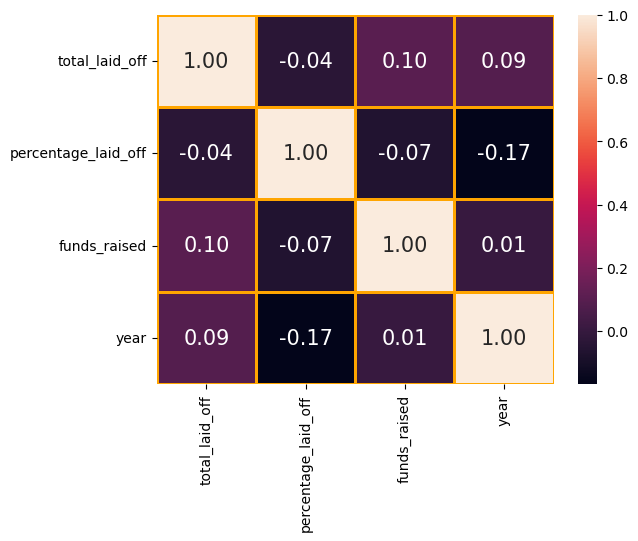

In [156]:
#Correlation Analysis
#By using heatmap of the data for checking the correlation between the numerical features and target column.

sns.heatmap(df_corr.corr(), annot = True, fmt = '0.2f', 
            annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')

1. From above correlation figure we can say total laid off has strong correlation with year and funds raised.
2. Percentage_laid_off and funds raised has weak correlation.

/tmp/ipykernel_11621/2406948693.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: title={'center': 'Total layoffs per month'}, xlabel='date'>

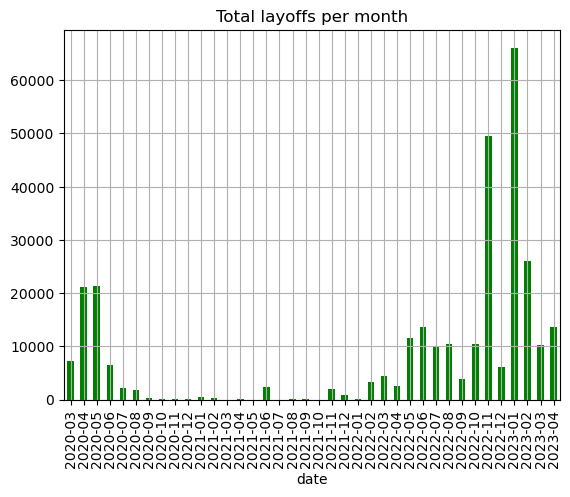

In [157]:
# By authors: Shreya Saha
#Group by month/Year
'''df = df[df['date'].notnull()].copy()
df['date'] = df['date'].astype('datetime64')
df.groupby(df['date'].dt.ye# Exploratory Data Analysisar).sum()
'''
## group date by months with the sum of all columns data (including total_laid_off)
## fillna(0): fill up missing bin or time with zero values (we assume zero mass layoff recorded in that missing month)
df['date'] = pd.to_datetime(df['date'])
df1 = df.groupby(df['date'].dt.to_period('M')).sum(numeric_only=True)
df1 = df1.resample('M').asfreq().fillna(0)
df1['total_laid_off'].plot(kind='bar', grid = True, color = 'green', title = 'Total layoffs per month')


There are more recent mass layoffs between 2022 November and 2023 April than all other times combined. 

In [158]:
#Group by company
top_10 = df.groupby('company').sum().reset_index().sort_values(by='total_laid_off',ascending=False)[['company','total_laid_off']].head(10)
top_10.head(4)
#top_10['total_laid_off'].plot(kind='barh', grid = True, title='Top 10 Companies with Maximum Lay-offs', )
px.bar(top_10,x='company',y='total_laid_off',text='total_laid_off',title='Top 10 Companies with Maximum Lay-offs',
      labels={'company':'Company','total_laid_off':'Total Lay-offs'})

/tmp/ipykernel_11621/4260994406.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [159]:
#Group by country
countrywise_laidoff = df.groupby(['country']).sum()

/tmp/ipykernel_11621/2007437147.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: title={'center': 'Layoffs per country'}, xlabel='country'>

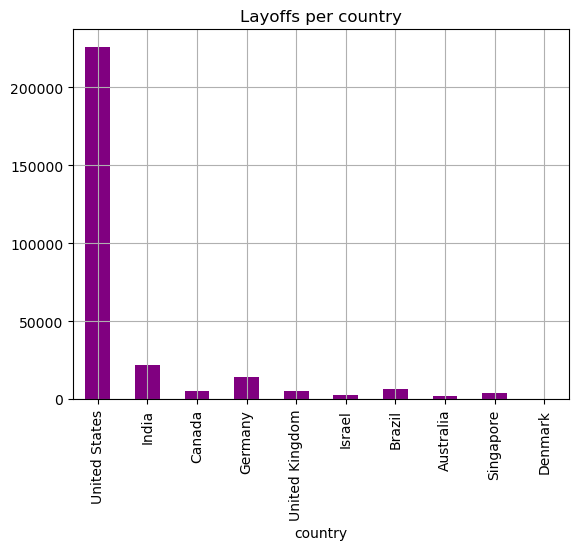

In [160]:
countrywise = countrywise_laidoff.sort_values('percentage_laid_off',ascending=False).head(10)
countrywise['total_laid_off'].plot(kind = 'bar', color = 'purple', grid = True, title = 'Layoffs per country')

The laid offs in United States is the highest, ~10 times more than the laid off in the second highest, India. 

['Finance' 'Other' 'Transportation' 'Recruiting' 'Infrastructure' 'Retail'
 'Food' 'Media' 'Consumer' 'HR' 'Real Estate' 'Crypto' 'Data' 'Marketing'
 'Healthcare' 'Education' 'Hardware' 'Fitness' 'Security' 'Travel' 'Sales'
 'Support' 'Product' 'Logistics' 'Legal' 'Manufacturing' 'Construction'
 'Aerospace' 'Energy']
29
(29, 3)


/tmp/ipykernel_11621/1472038813.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_11621/1472038813.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, '# of total laidoffs')

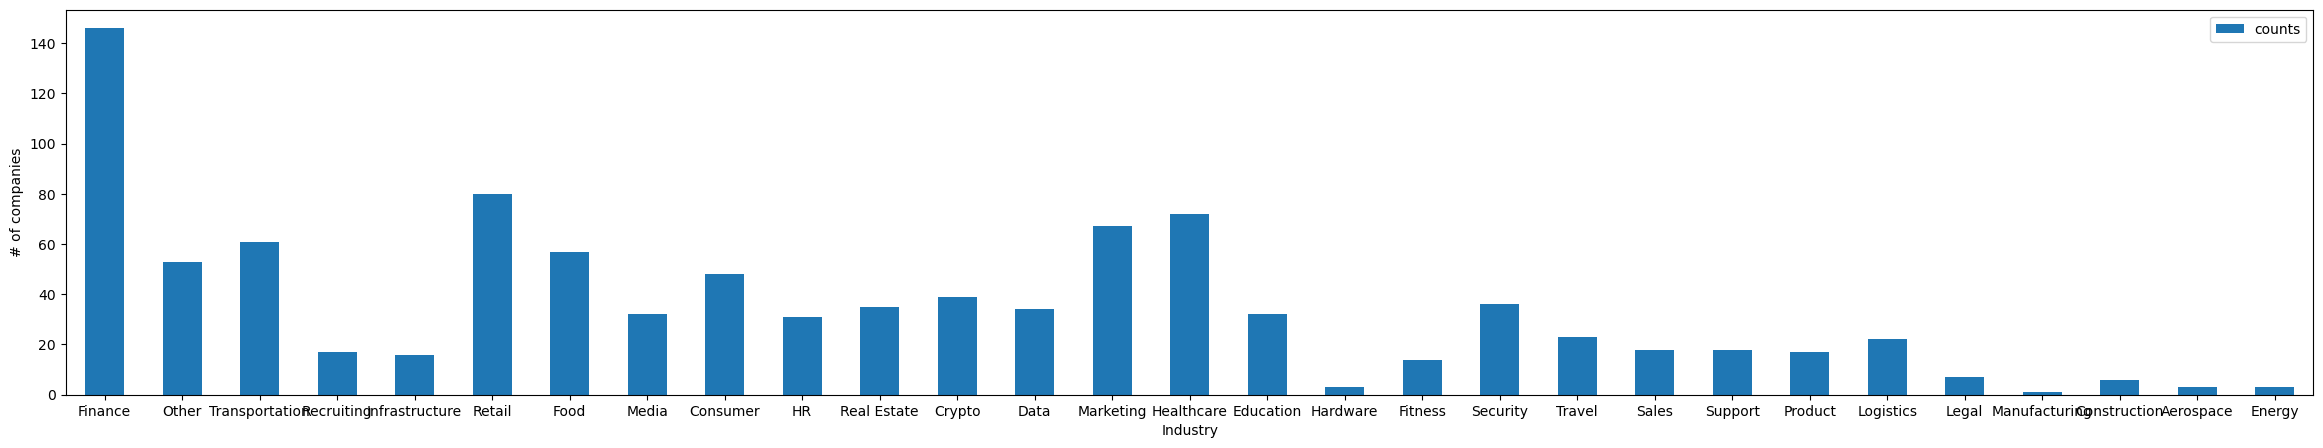

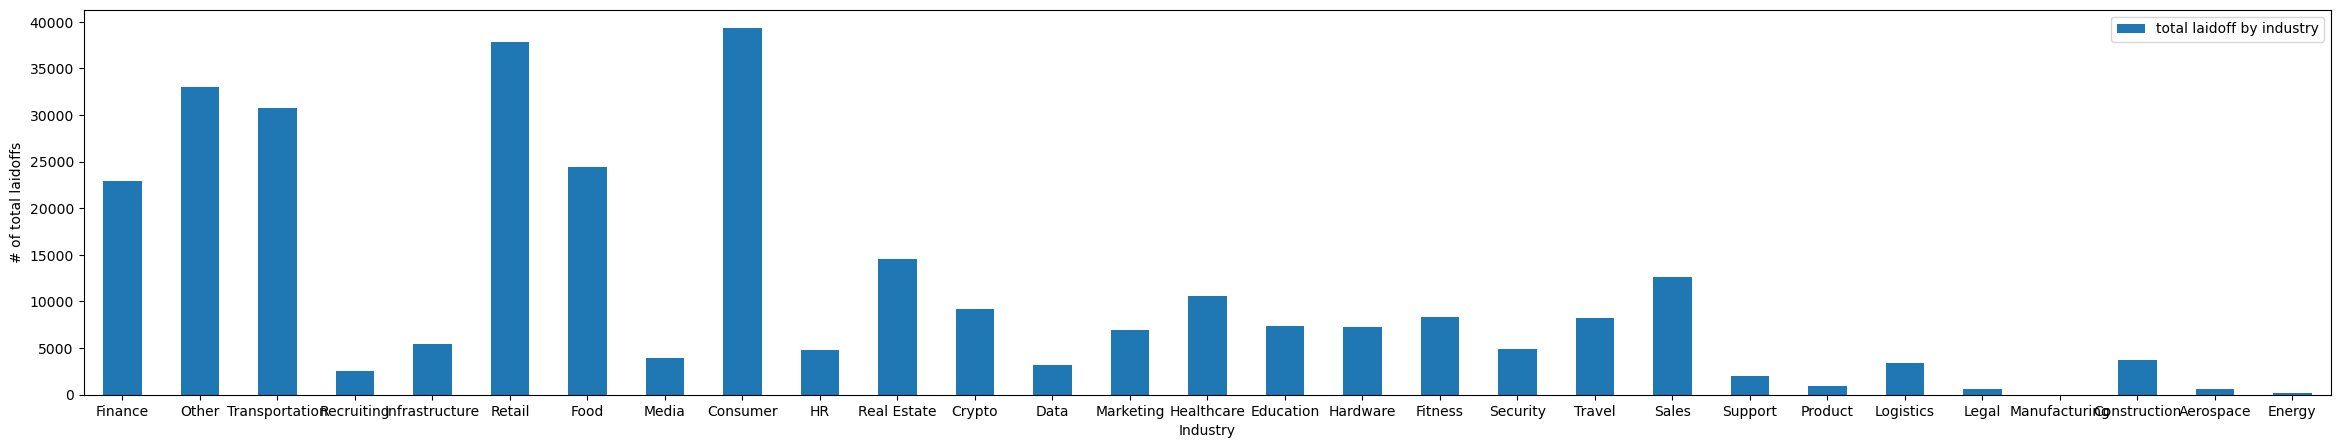

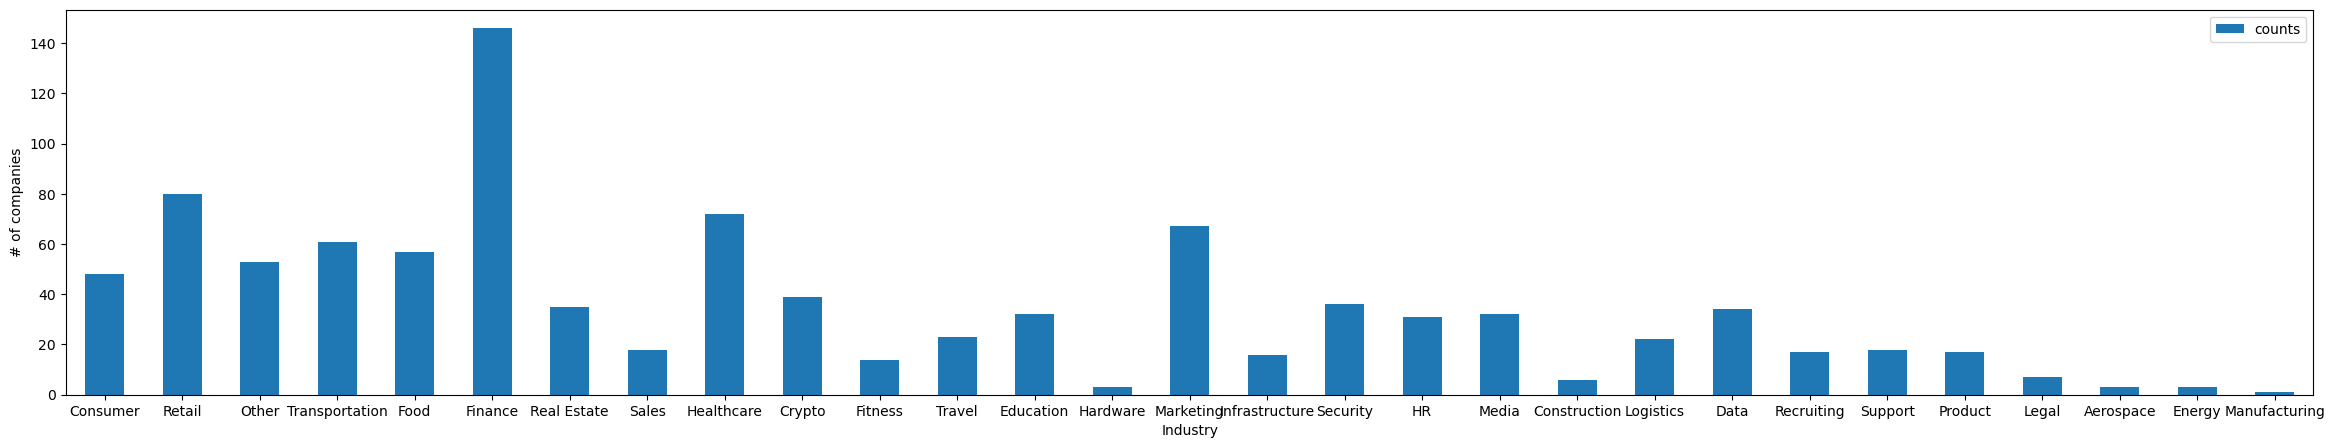

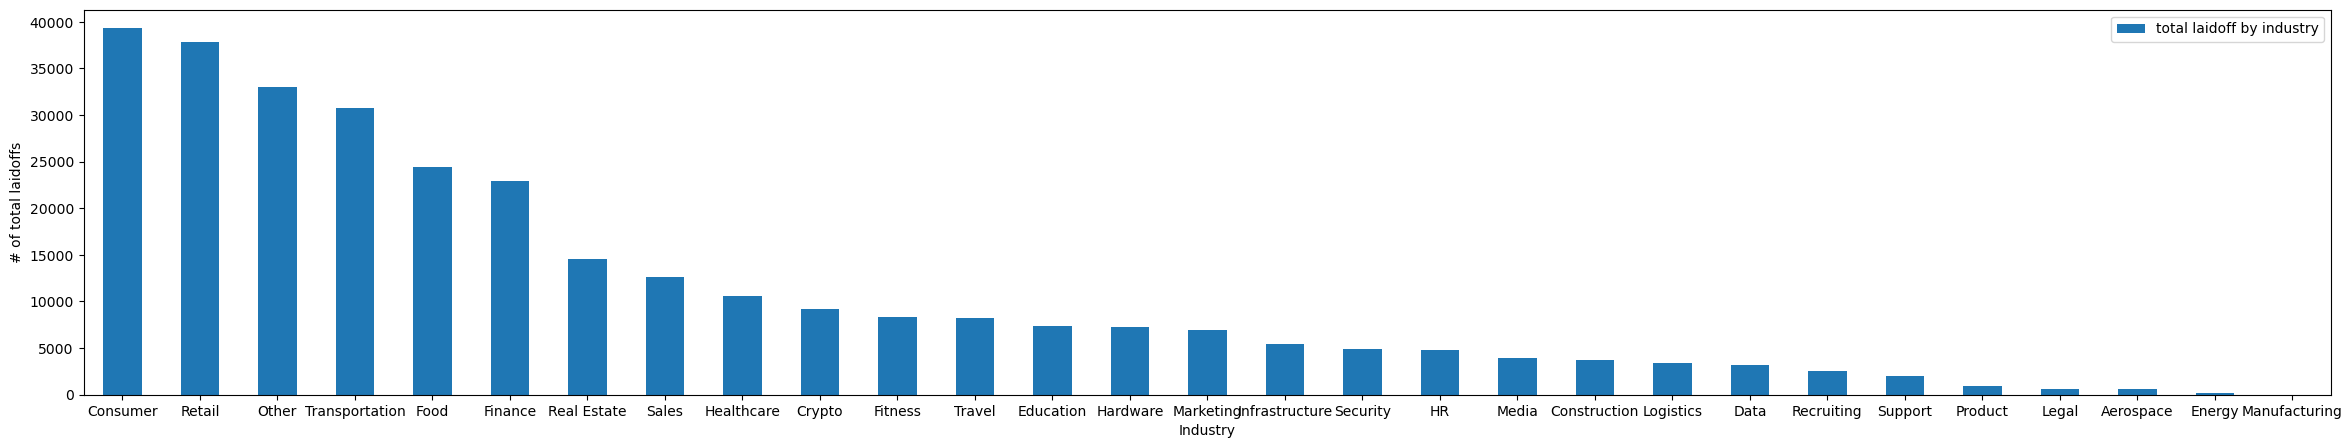

In [161]:
# By authors: Ya Huei Huang
## We plot two hisograms based on the type of industry; for each type of industry, we histogram the number ofcompanies
## and the number of total laid off. 
## We also sorted these two histogram by the nubmer of total laid off 

l = df['industry'].unique()
n_bin = len(l)

print(l)

hist_industry = pd.DataFrame(0, index=np.arange(n_bin), columns=['industry_bin','counts','total laidoff by industry'])

print(n_bin)
print(hist_industry.shape)

hist_industry['counts'].iloc[:]=0
hist_industry['total laidoff by industry'].iloc[:]=0

n = 0
a = []
for j in range(n_bin):
    n = 0
    for i in range(df.shape[0]):  
        if df['industry'].iloc[i] == l[j]: 
            n = n + 1
            a.append(df['company'].iloc[i])
            hist_industry['total laidoff by industry'].iloc[j]=hist_industry['total laidoff by industry'].iloc[j]+df['total_laid_off'].iloc[i]
            
            
    uniquelist = np.unique(a)   
    hist_industry['industry_bin'].iloc[j]=l[j]
    hist_industry['counts'].iloc[j]=len(uniquelist)
    a[:] = []
    
# print(hist_industry.index)
# print(hist_industry['total laidoff by industry'].iloc[0:10])
sort_hist_industry = hist_industry.sort_values('total laidoff by industry',ascending=False).head(29)


ax = hist_industry.plot.bar(x='industry_bin', y='counts', rot=0, figsize=(29, 5))
ax.set_xlabel('Industry')
ax.set_ylabel('# of companies')

ax1 = hist_industry.plot.bar(x='industry_bin', y='total laidoff by industry', rot=0, figsize=(29, 5))
ax1.set_xlabel('Industry')
ax1.set_ylabel('# of total laidoffs')

ax3 = sort_hist_industry.plot.bar(x='industry_bin', y='counts', rot=0, figsize=(29, 5))
ax3.set_xlabel('Industry')
ax3.set_ylabel('# of companies')

ax2 = sort_hist_industry.plot.bar(x='industry_bin', y='total laidoff by industry', rot=0, figsize=(29, 5))
ax2.set_xlabel('Industry')
ax2.set_ylabel('# of total laidoffs')

#companywise['counts'].plot(kind = 'bar', color = 'purple', grid = True, title = '# of company per industry')

#df_hardware = df[df['industry']=='Hardware']
#df_hardware.head(10)
#fig, ax = plt.subplots(figsize=(14,5))
#plt.plot(df_hardware.date, df_hardware.total_laid_off, 'b-', label="Total laidoff by time")
#ax.set_xlabel('Date')
#ax.set_ylabel('Total laid off')
#plt.title('Total laidoff by date (Hardware industry)')

Consumer and retail industries have laid off >35000 employees, and the numbers of companies are ~50 and 80 respectively. On the other hand, Finance industry laid off ~22000 and has the highest number of different companies, ~140. 

## Example: USA's EDA

In [162]:
# Since EDA for country vs laid off shows U.S. has laid off the highest number of employees on the globe between 2020 Jan and 2023 April.
# we want to know what happened to the companies in U.S.A.
# Boxplot for USA
usa = df[df.country=='United States']
usa.shape

(757, 10)

In [163]:
l = usa['industry'].unique()
print(l)

['Finance' 'Other' 'Transportation' 'Recruiting' 'Infrastructure' 'Media'
 'HR' 'Real Estate' 'Crypto' 'Data' 'Healthcare' 'Consumer' 'Education'
 'Retail' 'Food' 'Fitness' 'Security' 'Travel' 'Sales' 'Hardware'
 'Support' 'Marketing' 'Product' 'Legal' 'Logistics' 'Manufacturing'
 'Aerospace' 'Construction' 'Energy']


In [164]:
## Group by company in U.S.A.
usa_company = usa.groupby(["company"])

In [165]:
## Create a histogram to calculate the composition of the laidoff by the number of company
max_laidoff_in_usa = usa_company['total_laid_off'].max().max()
min_laidoff_in_usa = usa_company['total_laid_off'].min().min()

print(max_laidoff_in_usa, min_laidoff_in_usa)

width_bin_laidoff = 100.0

n_bin = np.int64((max_laidoff_in_usa - min_laidoff_in_usa)/width_bin_laidoff)

hist_laidoff_in_usa = pd.DataFrame(0, index=np.arange(n_bin), columns=['laidoff_bin','counts'])

print(n_bin)
print(hist_laidoff_in_usa.shape)

12000.0 3.0
119
(119, 2)


/tmp/ipykernel_11621/852341726.py:9: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



109    1
110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    0
118    0
Name: counts, dtype: int64
0        103
1        203
2        303
3        403
4        503
       ...  
114    11503
115    11603
116    11703
117    11803
118    11903
Name: laidoff_bin, Length: 119, dtype: int64


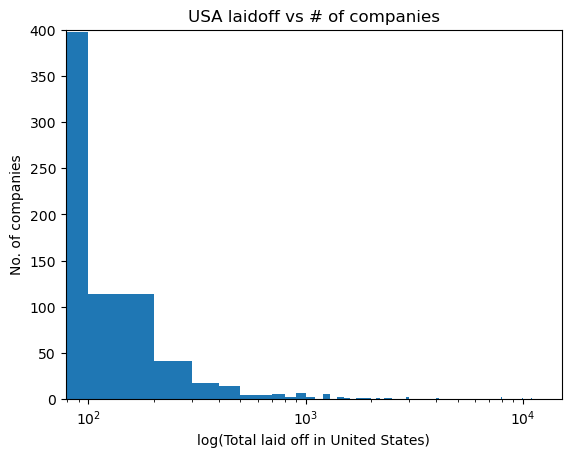

In [166]:
## Create a log histogram and visualize the composition of the laidoff by the number of company
hist_laidoff_in_usa['counts'].iloc[:]=0

for i in range(n_bin):
    value_bin = min_laidoff_in_usa + float(i+1)*width_bin_laidoff
    hist_laidoff_in_usa['laidoff_bin'].iloc[i] = value_bin

n = 0
for name, group in usa_company:
    n = n + 1
    n_group = group['total_laid_off'].shape
        
    for i in range(len(n_group)):
        
        value_in_group = group['total_laid_off'].values[i]
        
        for j in range(n_bin):

            bin_max = hist_laidoff_in_usa['laidoff_bin'].iloc[j] 
            bin_min = bin_max - width_bin_laidoff
            
            if value_in_group > bin_min and value_in_group <= bin_max:
                hist_laidoff_in_usa['counts'].iloc[j] = hist_laidoff_in_usa['counts'].iloc[j] + 1
                break


print(hist_laidoff_in_usa['counts'].tail(10))
print(hist_laidoff_in_usa['laidoff_bin'])

fig, ax = plt.subplots()

bins = np.arange(n_bin)
bins = bins * width_bin_laidoff
vals = np.zeros(n_bin)
vals = hist_laidoff_in_usa['counts'].iloc[:]
ax.bar(bins, vals, width=width_bin_laidoff, align='edge')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('log(Total laid off in United States)')
ax.set_ylabel('No. of companies')
#ax.set_xlim(3,20000)
ax.set_ylim(0,400)
plt.title('USA laidoff vs # of companies')
plt.show()

Analysis of relationship between total laid off and the number of companies in USA shows that few companies laid off
more than 10000 employees, but more small scaled companies laid off the order of hundreds employees.

# Task 1: Time series of mass layoffs 

### When did mass layoffs events occur? Is it time series a good model for predicting a future mass layoff?

By Author: Ya Huei Huang

## Exploratory Data Analysis

## 1) Time series of mass layoffs dataset

In [167]:
## Read in layoffs.csv again but with parse_dates option parsing the date
## in the common format to be compatiable with the stock market and COVID data

data_another = pd.read_csv("layoffs.csv",parse_dates=['date'])

#Drop the rows where at least one element in a row is missing
no_null_data_another = data_another.dropna()

#Drop Duplicates
df_another = no_null_data_another.drop_duplicates()
df_another.shape
df_another.head()

print(type(df_another['date'].iloc[0]),type(df['date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


Text(0.5, 1.0, 'Total laidoff by date')

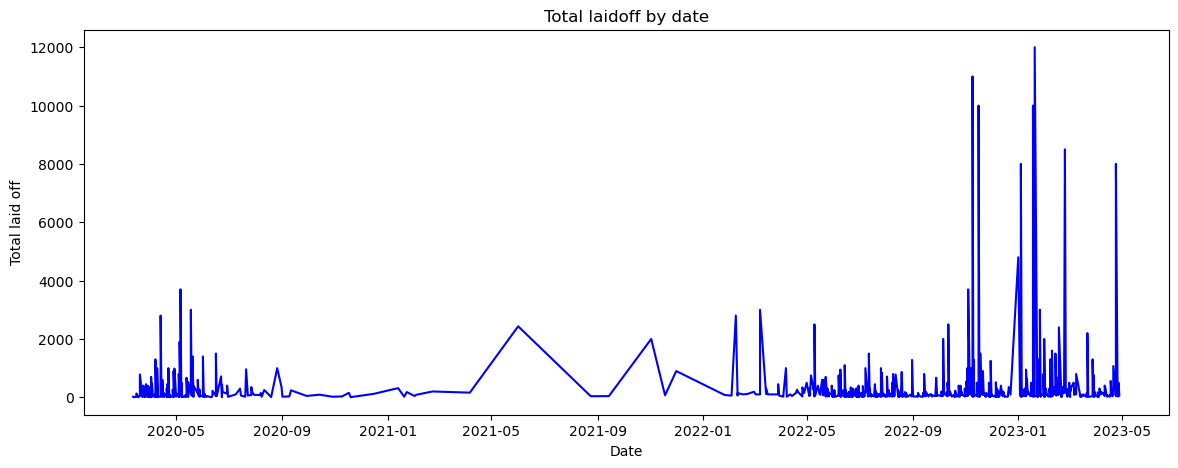

In [168]:
fig, ax = plt.subplots(figsize=(14,5))

plt.plot(df_another.date, df_another.total_laid_off, 'b-', label="Total laidoff by time")
ax.set_xlabel('Date')
ax.set_ylabel('Total laid off')
plt.title('Total laidoff by date')

Text(0.5, 1.0, 'Percentage laidoff by date')

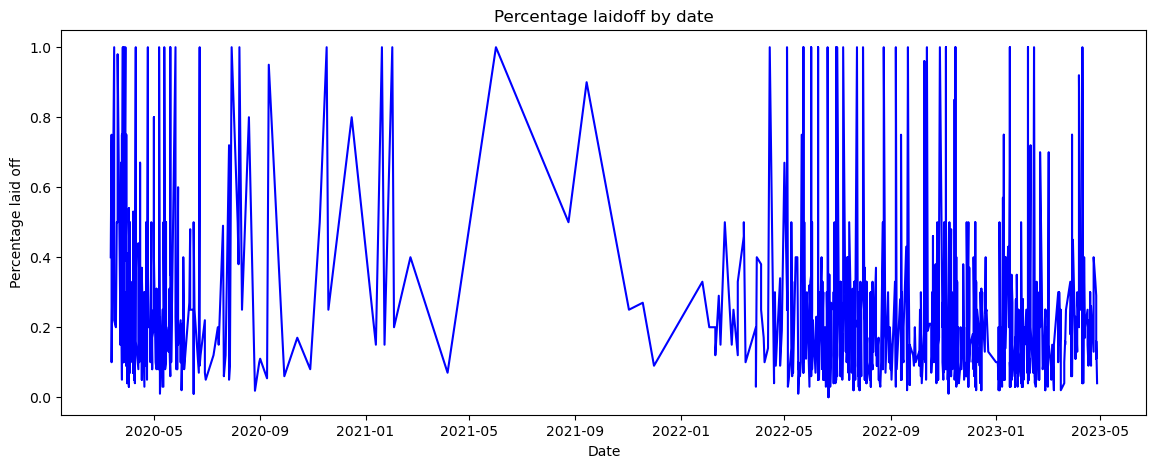

In [169]:
fig, ax = plt.subplots(figsize=(14,5))

plt.plot(df_another.date, df_another.percentage_laid_off, 'b-', label="Percentage laid off by time")
ax.set_xlabel('Date')
ax.set_ylabel('Percentage laid off')
plt.title('Percentage laidoff by date')

         total_laid_off  percentage_laid_off  funds_raised
date                                                      
2020-03           False                False         False
2020-04           False                False         False
2020-05           False                False         False
2020-06           False                False         False
2020-07           False                False         False
2020-08           False                False         False
2020-09           False                False         False
2020-10           False                False         False
2020-11           False                False         False
2020-12           False                False         False
2021-01           False                False         False
2021-02           False                False         False
2021-03            True                 True          True
2021-04           False                False         False
2021-05            True                 True          Tr

<AxesSubplot: title={'center': 'Total layoffs per month'}, xlabel='date'>

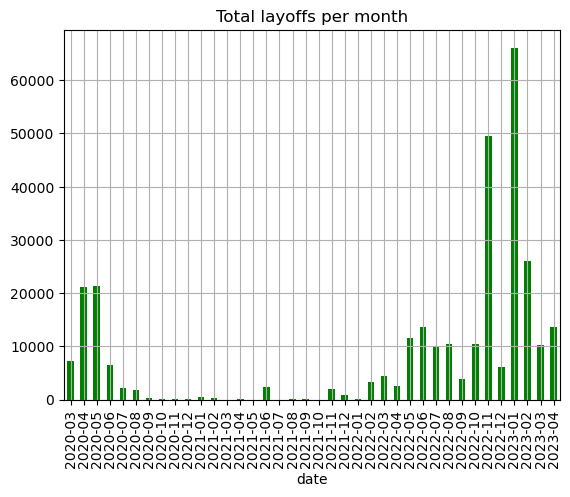

In [170]:
# We wanted to try time series analysis but realized there are either no laid off data or true zero laid off at missing date
# So we decided to average the total laid off by a period of a month
# Total laid off per month using a part of the code from EDA by Shreya 
df_another1 = df_another.groupby(df_another['date'].dt.to_period('M')).sum(numeric_only=True)
df_another1_na = df_another1.resample('M').asfreq()
## We assume zero laid off for missing time 2021-03, 2021-05, 2021-07, and 2021-10
df_another1 = df_another1.resample('M').asfreq().fillna(0)

print(df_another1_na.isna())
df_another1['total_laid_off'].plot(kind='bar', grid = True, color = 'green', title = 'Total layoffs per month')

We have three missing months 2021-03, 2021-05, 2021-07, and 2021-10, which are not perfect but better than using date

<AxesSubplot: title={'center': 'Median layoffs per month'}, xlabel='date'>

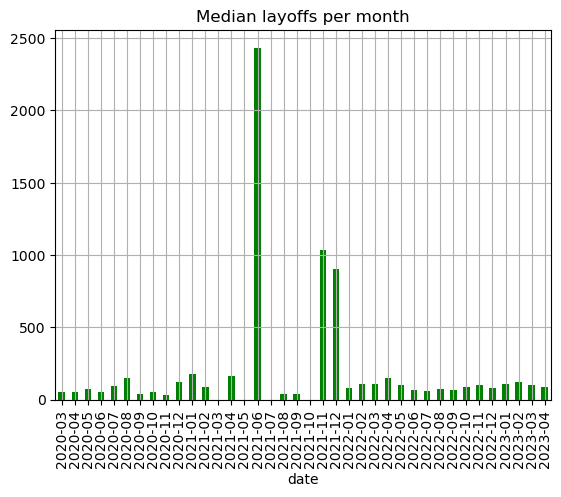

In [171]:
## Median laid off per month
df_another2 = df_another.groupby(df_another['date'].dt.to_period('M')).median(numeric_only=True)
df_another2 = df_another2.resample('M').asfreq().fillna(0)
df_another2['total_laid_off'].plot(kind='bar', grid = True, color = 'green', title = 'Median layoffs per month')

<AxesSubplot: title={'center': 'Median percentage layoffs per month'}, xlabel='date'>

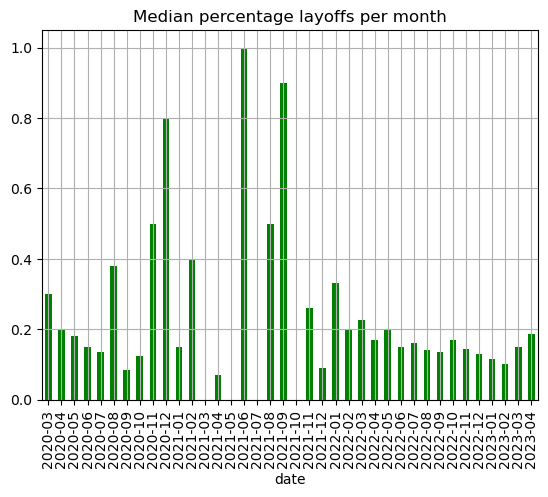

In [172]:
## Median percentage laid off per month
df_another3 = df_another.groupby(df_another['date'].dt.to_period('M')).median(numeric_only=True)
df_another3 = df_another3.resample('M').asfreq().fillna(0)
df_another3['percentage_laid_off'].plot(kind='bar', grid = True, color = 'green', title = 'Median percentage layoffs per month')

## Autocorrelation and Stationarity

In [173]:
# STATESMODEL Python package can be downloaded from https://www.statsmodels.org/stable/install.html 
# statesmodel provides classes and function of different statical models 
import statsmodels.api as sm

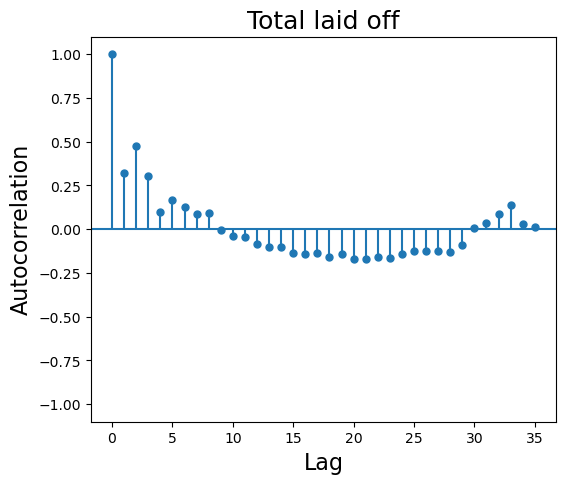

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
sm.graphics.tsa.plot_acf(df_another1['total_laid_off'],
                         lags=35,
                         alpha=None,
                         ax=ax)

plt.title('Total laid off', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

Our mentor, Nicole, at the Erdos Institute pointed out that a skewness of total laid off data (skewing more laid off in more recent time) might bias the autocorrelation plot here.

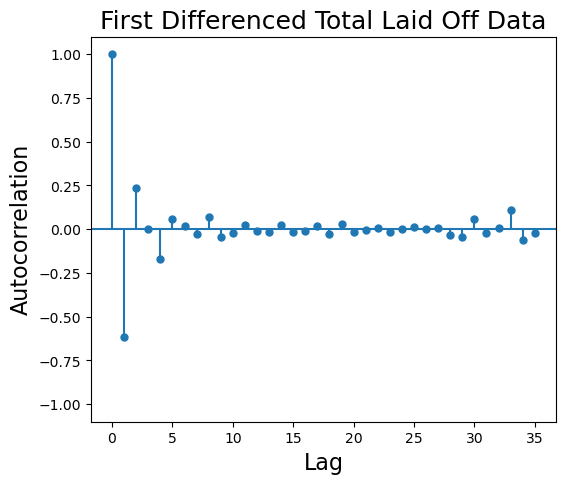

In [175]:
# Differencing the total laid off data by time step of a month
# We want to see if there is particular trend 
fig, ax = plt.subplots(1, 1, figsize=(6,5))

## use pandas .diff()
sm.graphics.tsa.plot_acf(df_another1['total_laid_off'].diff()[1:],
                         lags=35,
                         alpha=None,
                         ax=ax)

plt.title('First Differenced Total Laid Off Data', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

The skewness of total laid off data appears to be still present

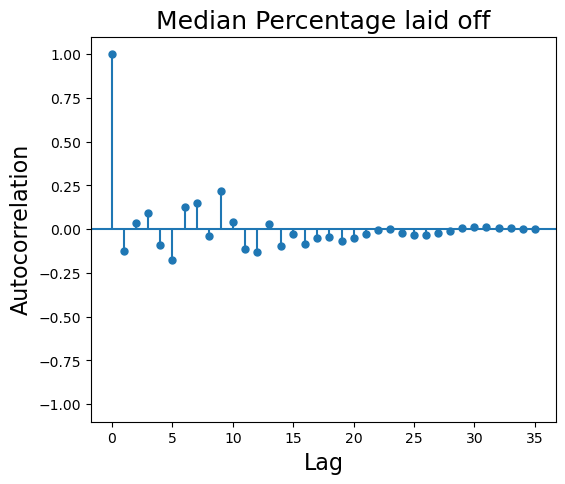

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
sm.graphics.tsa.plot_acf(df_another3['percentage_laid_off'],
                         lags=35,
                         alpha=None,
                         ax=ax)

plt.title('Median Percentage laid off', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

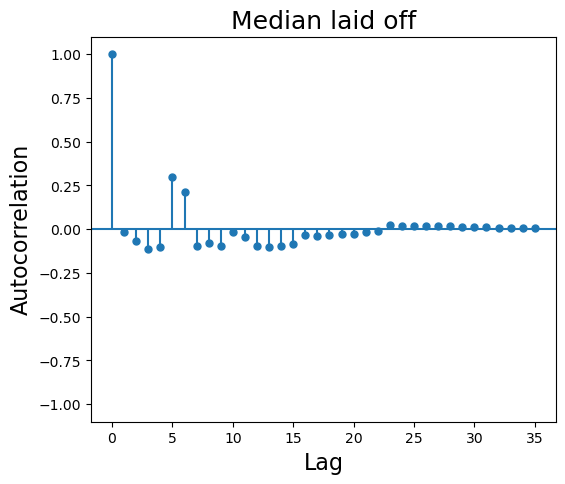

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
sm.graphics.tsa.plot_acf(df_another2['total_laid_off'],
                         lags=35,
                         alpha=None,
                         ax=ax)

plt.title('Median laid off', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

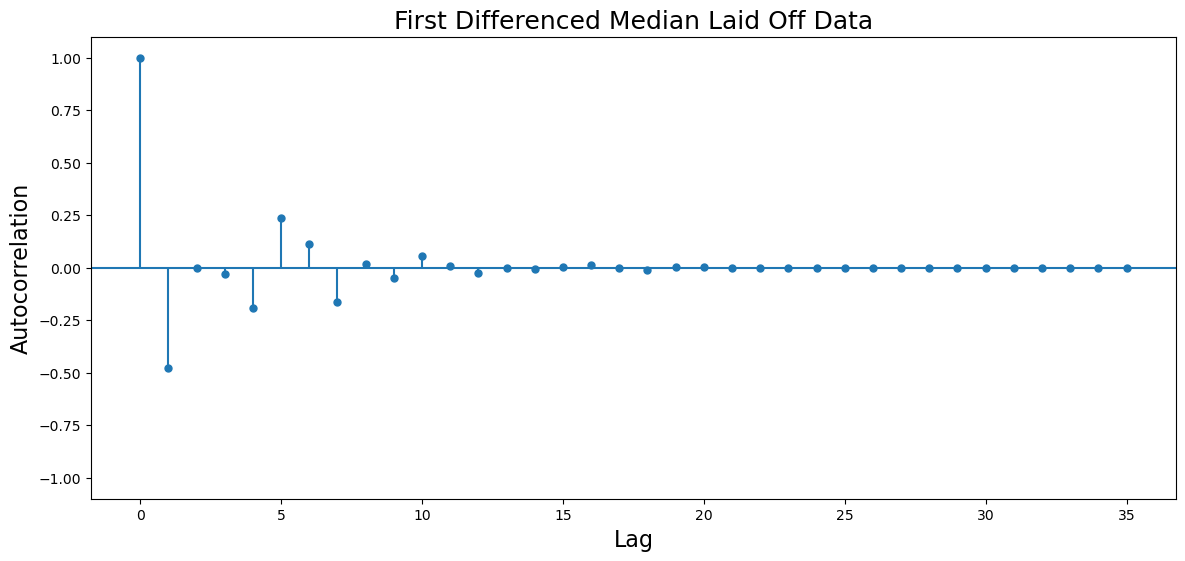

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))

## use pandas .diff()
sm.graphics.tsa.plot_acf(df_another2['total_laid_off'].diff()[1:],
                         lags=35,
                         alpha=None,
                         ax=ax)

plt.title('First Differenced Median Laid Off Data', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

It seems it is tricky to interpret the time series data from autocorrelation plots, so we decide to "visual-inspect" the trends between mass layoffs and the other time-dependent data, such as stock market and COVID death cases.

## 2) S&P 500 dataset

In [179]:
# We download S & P 500 USA stock market data from Kaggle.com
# https://www.kaggle.com/datasets/camnugent/sandp500?datasetId=1908&sortBy=voteCount

# ''The datetime module supplies classes for manipulating dates and times.'' quote from https://docs.python.org/3/library/datetime.html 
from datetime import datetime
sp = pd.read_csv("SP500.csv", parse_dates=['date'])
sp.head(2)

,date,close,Volume,Open,High,Low
0,2023-05-17,4158.77,--,4122.85,4164.67,4113.62
1,2023-05-16,4109.90,--,4127.95,4135.54,4109.86


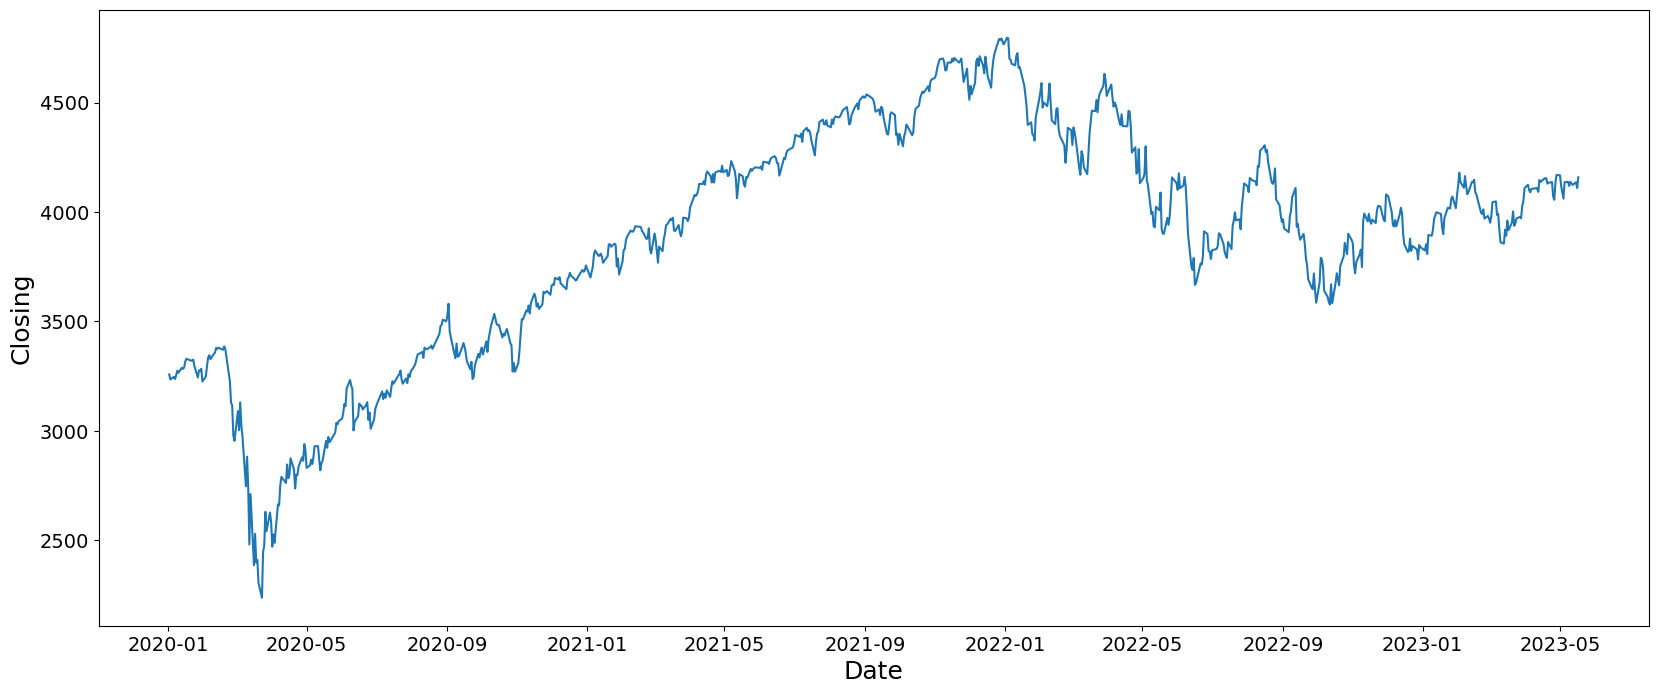

In [180]:
plt.figure(figsize=(20,8))

plt.plot(sp.loc[sp.date >= datetime(2020,1,1)].date, sp.loc[sp.date >= datetime(2020,1,1)].close)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

/tmp/ipykernel_11621/2076382787.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: title={'center': 'Average S&P 500 per month'}, xlabel='date'>

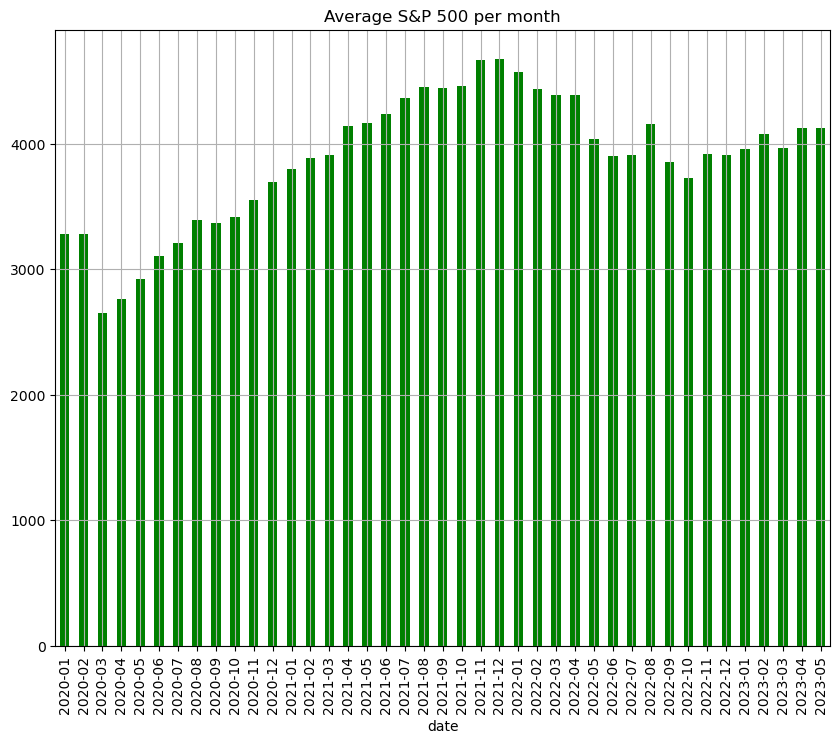

In [181]:
sp_1 = sp[sp['date'] >= datetime(2020,1,1)]
sp1 = sp_1.groupby(sp_1['date'].dt.to_period('M')).mean()
sp1 = sp1.resample('M').asfreq().fillna(0)
plt.figure(figsize=(10,8))
sp1['close'].plot(kind='bar', grid = True, color = 'green', title = 'Average S&P 500 per month')

S&P 500 stock market appears to trend upward ...  

## 3) Time series of COVID19 dataset

/tmp/ipykernel_11621/2793909942.py:3: DtypeWarning:

Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_11621/2793909942.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: title={'center': 'COVID-19 new deaths per month'}, xlabel='date'>

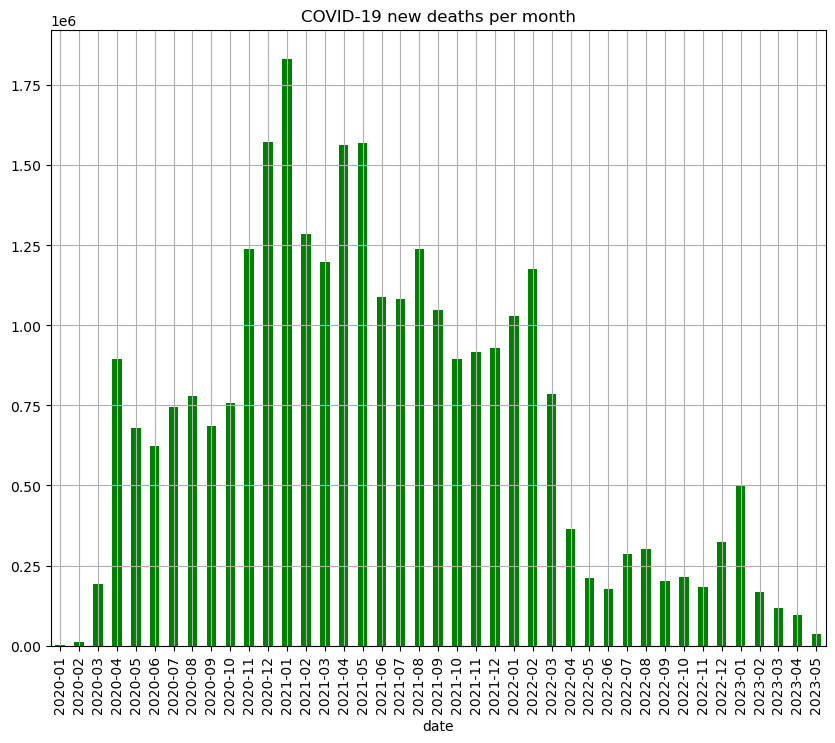

In [182]:
## COVID-19 data until recent time
## https://www.kaggle.com/datasets/taranvee/covid-19-dataset-till-2222022
covid19_1 = pd.read_csv('owid-covid-data.csv')
covid19_1.shape
list(covid19_1.columns.values)

covid19_1['date'] = pd.to_datetime(covid19_1['date'])
no_null_covid = covid19_1.dropna(subset=['date', 'new_deaths'])
no_null_data_covid =no_null_covid.drop_duplicates()
df_covid = no_null_data_covid.groupby(no_null_data_covid['date'].dt.to_period('M')).sum()
df_covid = df_covid.resample('M').asfreq().fillna(0)
plt.figure(figsize=(10,8))
df_covid['new_deaths'].plot(kind='bar', grid = True, color = 'green', title = 'COVID-19 new deaths per month')

#no_null_data_covid.shape
#Drop Duplicates
#df_covid = no_null_data_covid.drop_duplicates()
#df_covid.shape

COVID deaths are higher between 2021 Nov and 2022 Feb than before 2021 Nov and after 2022 Feb.

# Task 2: Linear Regression Model

By Author: Ya Huei Huang

As a predictive model, we want to predict the probability and number of laid-off based on a company's stage, industry type, stock market, country origin (related to GDP), and more things (not in this project) such as salary and demoncratic.

## First, let's investigate if industry types have any impact on total laid offs

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

55.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

35.3% of the points cannot be placed; you may want 

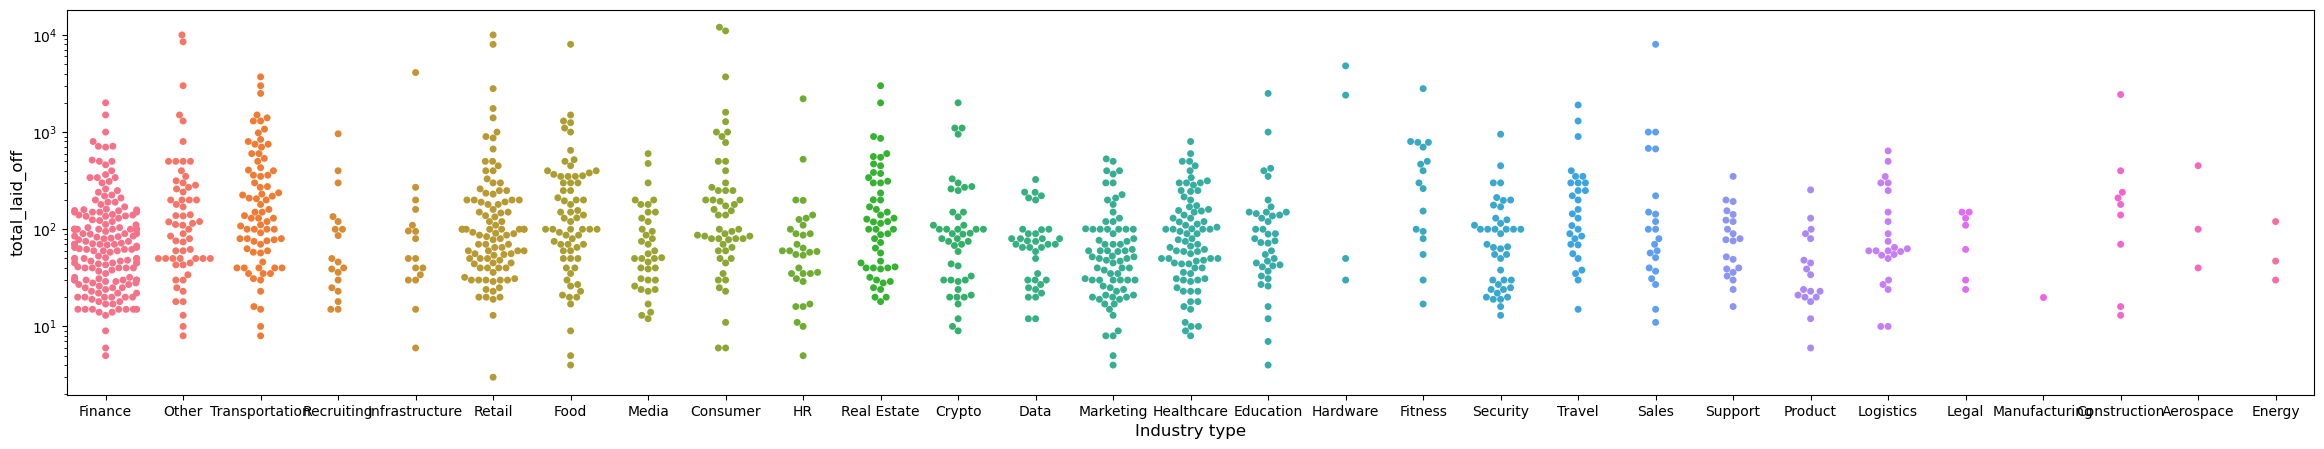

In [183]:
#print(df.columns)

#industrywise = df.groupby(['industry'])
#print((industrywise))
#num_vars = ['age', 'fare']
#cat_vars = ['pclass', 'embarked', 'sex']

## Make a figure object
#plt.figure(figsize=(14,5))
fig, ax = plt.subplots(figsize=(29,5))

## Call swarmplot
## First put in the dataframe in data = 
## Then what you want on the x and y axis
## Finally, palette, an optional input, allows me to color the points
sns.swarmplot(data=df_another,
               x = 'industry',
               y = 'total_laid_off',
            hue='industry',
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Industry type", fontsize=12)
plt.ylabel("total_laid_off", fontsize=12)
ax.set_yscale('log')

plt.show()

## Let's investigate if stage have any impact on total laid offs

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

89.9% of the points cannot be placed; you may want 

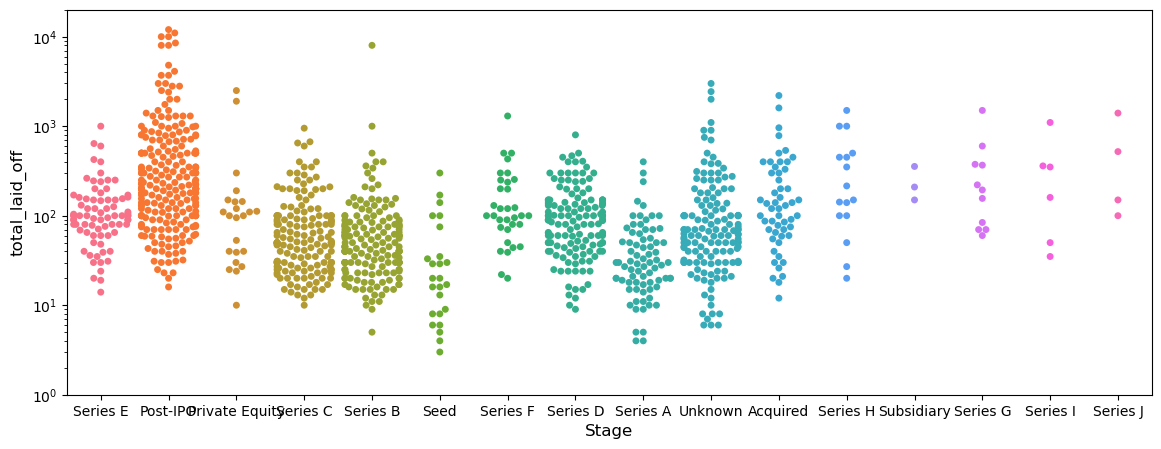

In [184]:
fig, ax = plt.subplots(figsize=(14,5))

sns.swarmplot(data=df_another,
               x = 'stage',
               y = 'total_laid_off',
            hue='stage',
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("total_laid_off", fontsize=12)
ax.set_yscale('log')
plt.ylim(1,20000)
plt.show()

For the observed total laid off data, it seems company stages show more variation of total laid off than in industry.

## Let's investigate if stage have any impact on percentage laid offs

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

17.0% of the points cannot be placed; you may want 

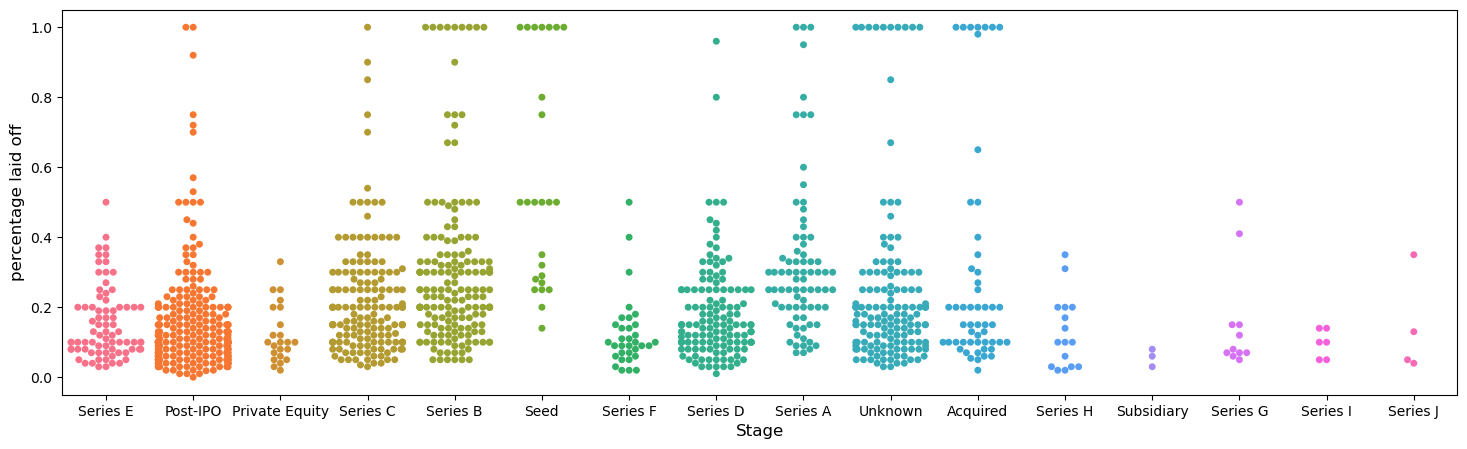

In [185]:
fig, ax = plt.subplots(figsize=(18,5))

sns.swarmplot(data=df_another,
               x = 'stage',
               y = 'percentage_laid_off',
            hue='stage',
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("percentage laid off", fontsize=12)
plt.show()

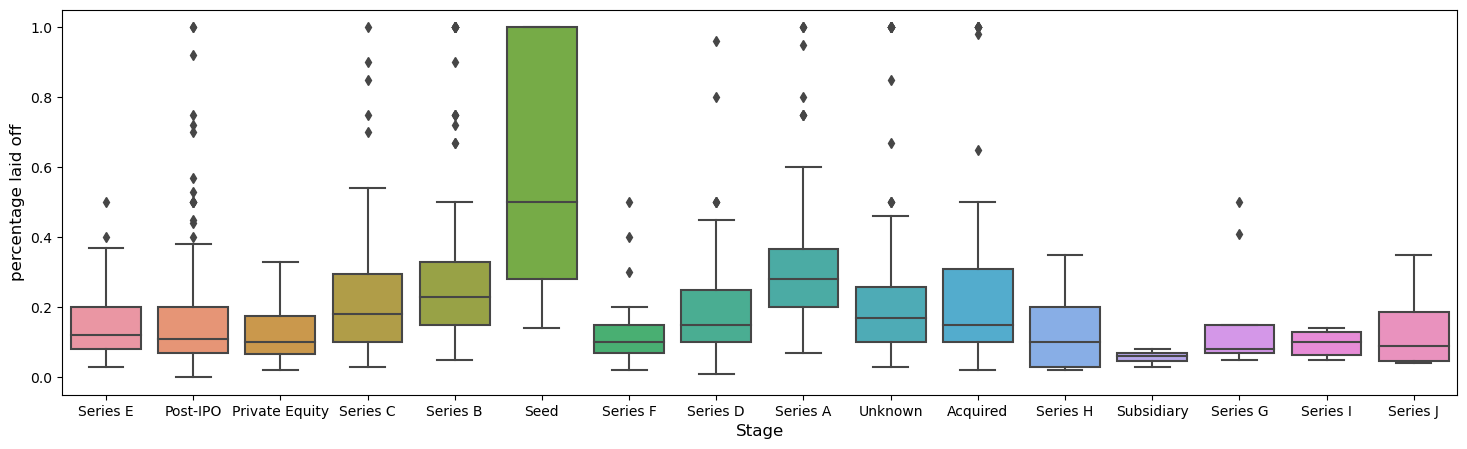

In [186]:
# We visualize the percentage laid off data using box plots
fig, ax = plt.subplots(figsize=(18,5))

sns.boxplot(data=df_another,
               x = 'stage',
               y = 'percentage_laid_off',
               hue='stage',
               dodge=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("percentage laid off", fontsize=12)
plt.legend([],[], frameon=False)
plt.show()

## Let's investigate if industry have any impact on percentage laid offs

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



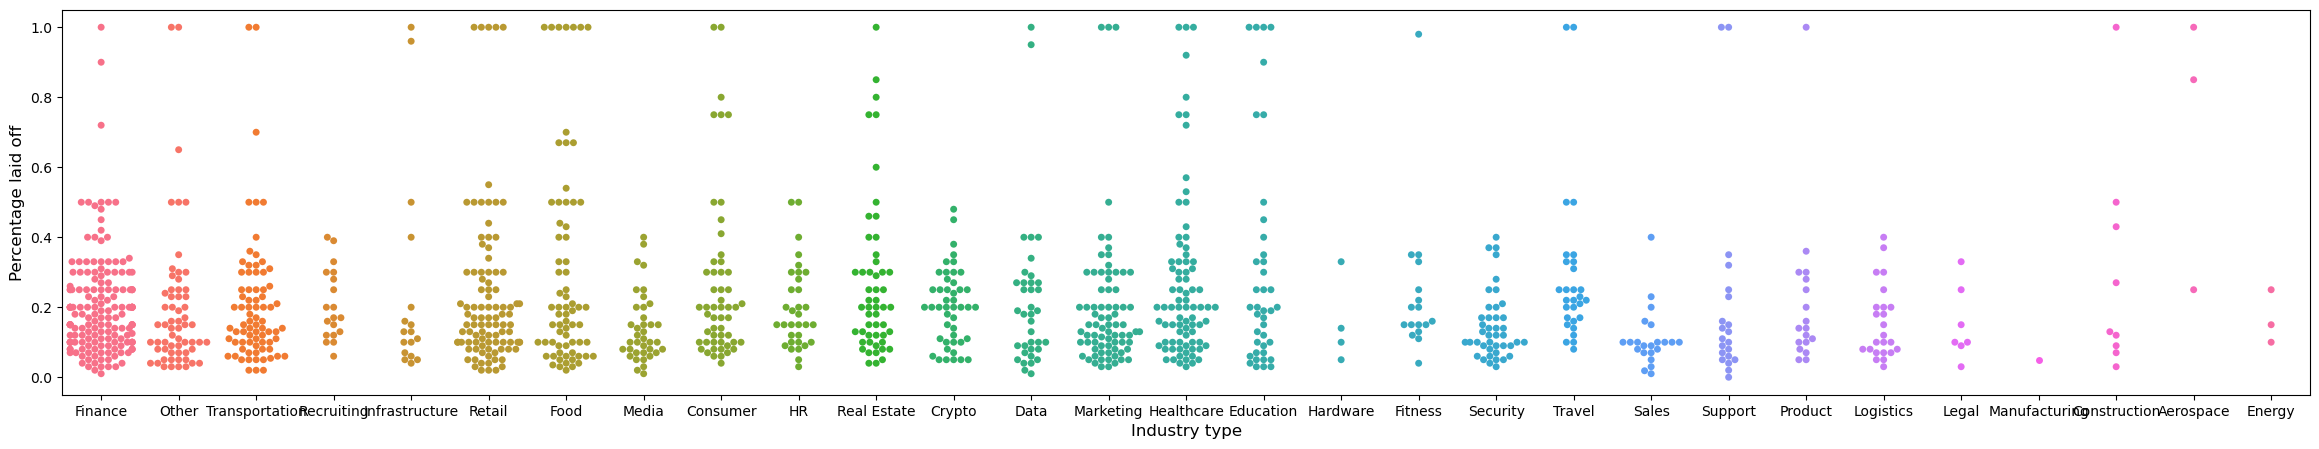

In [187]:
fig, ax = plt.subplots(figsize=(29,5))

sns.swarmplot(data=df_another,
               x = 'industry',
               y = 'percentage_laid_off',
            hue='industry',
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Industry type", fontsize=12)
plt.ylabel("Percentage laid off", fontsize=12)
plt.show()

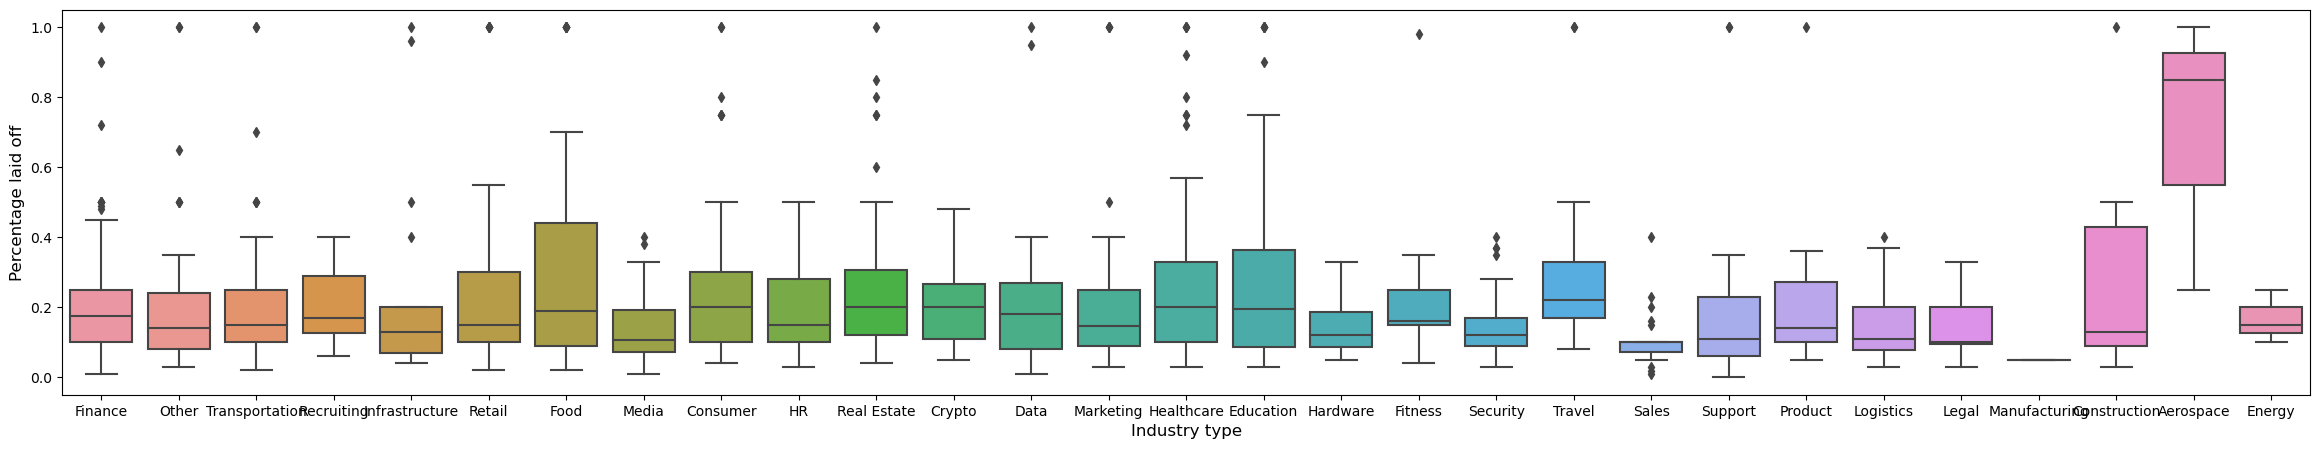

In [188]:
fig, ax = plt.subplots(figsize=(29,5))

## Call swarmplot
## First put in the dataframe in data = 
## Then what you want on the x and y axis
## Finally, palette, an optional input, allows me to color the points
sns.boxplot(data=df_another,
               x = 'industry',
               y = 'percentage_laid_off',
               hue='industry',
               dodge=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Industry type", fontsize=12)
plt.ylabel("Percentage laid off", fontsize=12)
plt.legend([],[], frameon=False)
plt.show()

## Now let's run linear regression model!

In [189]:
# Pull tran test split function and linear regression from sklearn module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

laidoff_train, laidoff_test = train_test_split(df_another.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)

In [190]:
dummy = pd.get_dummies(laidoff_train['stage']).columns
column_names = list(dummy)
print(column_names)
print(pd.get_dummies(laidoff_train['stage']).values)
print(pd.get_dummies(laidoff_train['stage']))

['Acquired', 'Post-IPO', 'Private Equity', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Subsidiary', 'Unknown']
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
      Acquired  Post-IPO  Private Equity  Seed  Series A  Series B  Series C  \
108          1         0               0     0         0         0         0   
2342         0         0               0     0         0         1         0   
976          0         0               0     0         0         0         0   
1054         0         0               0     0         0         1         0   
1009         0         0               0     0         0         1         0   
...        ...       ...             ...   ...       ...       ...       ...   
1046         0         0               0     0         0         0         1   
2234         0         0               0    

In [191]:
# We decide to do a linear regression model with percentage laid off, as we feel the data might be biased by 
# large number of laid off from a single or few companies 

# Store the one-hot coding variable in laidoff_train here
# https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/ 

laidoff_train.loc[:,pd.get_dummies(laidoff_train['stage']).columns] = pd.get_dummies(laidoff_train['stage'])
[pd.get_dummies(laidoff_train['stage']).columns]

/tmp/ipykernel_11621/244825464.py:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



[Index(['Acquired', 'Post-IPO', 'Private Equity', 'Seed', 'Series A',
        'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G',
        'Series H', 'Series I', 'Series J', 'Subsidiary', 'Unknown'],
       dtype='object')]

There appears to be a trend between `stage` and `total laid off`. Our first two models will thus be the simple baseline and a simple linear regression regressing `total laid off` on `stage`.

##### Baseline model

$$
\text{Laidoff} = E(\text{laidoff}) + \epsilon
$$

##### Stage model


$$
\text{Laidoff} = \beta_0 + \beta_{i>0} \text{stage_{i>0}} + \epsilon
$$


In [192]:
## import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

##### Model 1 &2: Use percentage of laid off

In [193]:
## baseline model
mses1 = np.zeros((3, 1))

i = 0 
pred_baseline1 = laidoff_train.percentage_laid_off.mean()*np.ones(len(laidoff_train))
mses1[0,i] = mse(laidoff_train.percentage_laid_off.values, pred_baseline1)

print(np.mean(mses1, axis=1)[0])

print("The average mse for the baseline model using percentage is",
                    np.round(np.mean(mses1, axis=1)[0],decimals =4))

0.04456357170047108
The average mse for the baseline model using percentage is 0.0446


In [194]:
## stage model
## make the model object
## Use LInearRegression as our first model instance

stage_lr1 = LinearRegression(copy_X = True)

## make a list of column names, which is x axis as our independent measurements 
## So, it is a multiple linear regression ("stage" one-hot encoding has 16 types of company stages)
## https://sparkbyexamples.com/pandas/pandas-get-column-names/

print(laidoff_train[column_names].shape)
print(laidoff_train['percentage_laid_off'].shape)

## Fit the model
stage_lr1.fit(laidoff_train[column_names].values,
             laidoff_train['percentage_laid_off'].values)

(932, 16)
(932,)


LinearRegression()

In [195]:
# Predict percentage laid off from the train data sets
pred_stage_lr1 = stage_lr1.predict(laidoff_train[column_names].values)

In [196]:
mses1[1,0] = mse(laidoff_train.percentage_laid_off.values, pred_stage_lr1)

print("The average mse for the stage model is",
                    np.round(np.mean(mses1, axis=1)[1],decimals =4))

The average mse for the stage model is 0.0381


In [197]:
# Output the baseline and stage models' MSEs
print("The average mse for the stage model in train set is",
                    np.round(np.mean(mses1, axis=1)[1],decimals =4))
print("The average mse for the baseline model in train set is",
                    np.round(np.mean(mses1, axis=1)[0],decimals =4))

The average mse for the stage model in train set is 0.0381
The average mse for the baseline model in train set is 0.0446


In [198]:
# Create a two dimension array to store 1) predicted percentage laid off by stage model and 2) stage
print(laidoff_train.shape[0])
df_stage_lr1 = pd.DataFrame(0, index=np.arange(laidoff_train.shape[0]), columns=['stage','pred_stage_lr1'])

for i in range(laidoff_train.shape[0]):
    df_stage_lr1['stage'].iloc[i] = laidoff_train['stage'].iloc[i]

df_stage_lr1['pred_stage_lr1'] = pred_stage_lr1

print(df_stage_lr1.shape)

932
(932, 2)


In [199]:
# Create a two dimension array to store 1) predicted percentage laid off by baseline model and 2) stage
df_baseline1 = pd.DataFrame(0, index=np.arange(laidoff_train.shape[0]), columns=['stage','pred_baseline1'])

for i in range(laidoff_train.shape[0]):
    df_baseline1['stage'].iloc[i] = laidoff_train['stage'].iloc[i]

df_baseline1['pred_baseline1'] = pred_baseline1

print(df_baseline1.shape)

(932, 2)


/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

9.8% of the points cannot be placed; you may want t

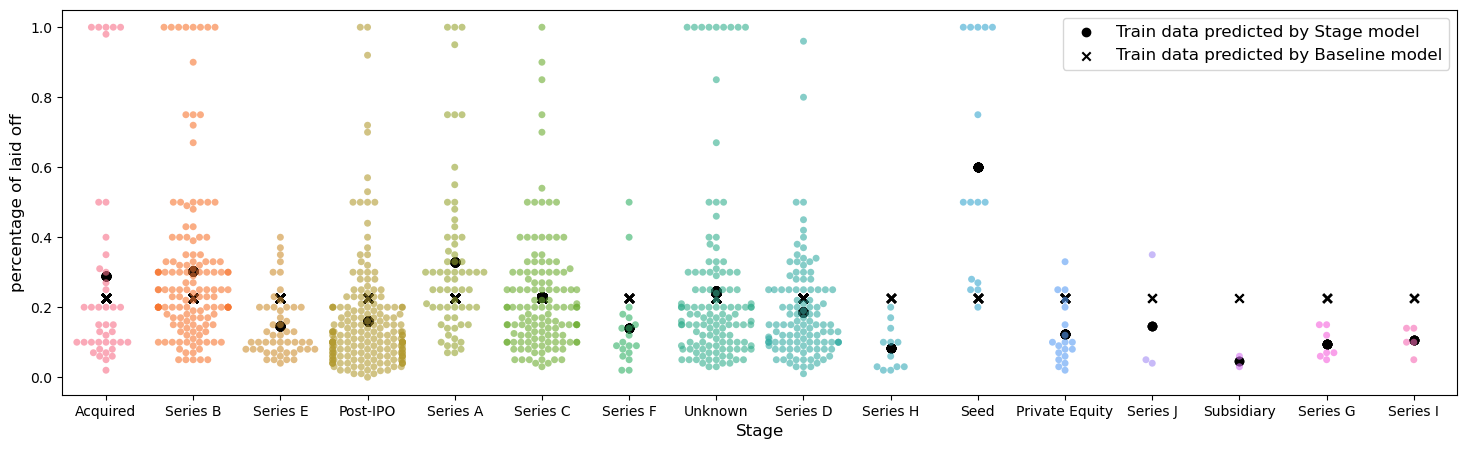

In [200]:
fig, ax = plt.subplots(figsize=(18,5))

plt.scatter(df_stage_lr1['stage'], df_stage_lr1['pred_stage_lr1'], c='black', marker='o', label="Train data predicted by Stage model")

plt.scatter(df_baseline1['stage'], df_baseline1['pred_baseline1'], c='black',  marker='x', label="Train data predicted by Baseline model")

sns.swarmplot(data=laidoff_train,
               x = 'stage',
               y = 'percentage_laid_off',
               hue='stage', alpha=0.6,
               legend=False)

plt.xlabel("Stage", fontsize=12)
plt.ylabel("percentage of laid off", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.show()
#                order = ['Seed','Series A','Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 
#                       'Series H', 'Series I', 'Series J', 'Acquired', 'Post-IPO', 'Private Equity', 'Subsidiary',
#                       'Unknown'],

Create a dummy for test set

In [201]:
laidoff_test.loc[:,pd.get_dummies(laidoff_test['stage']).columns] = pd.get_dummies(laidoff_test['stage'])[pd.get_dummies(laidoff_test['stage']).columns]

/tmp/ipykernel_11621/1995949124.py:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



Calculate regression's accuracy in R2 score (accuracy in regression model is captured ambiguously by R-squared)
- https://scikit-learn.org/stable/modules/classes.html#regression-metrics
- https://stackoverflow.com/questions/45627784/unable-to-obtain-accuracy-score-for-my-linear 

In [202]:
# Create Linear regression object
clf = LinearRegression()

# Train Linear regression model
clf = clf.fit(laidoff_test[column_names].values,
             laidoff_test['percentage_laid_off'].values)

#Predict the response for test dataset
y_test = laidoff_test['percentage_laid_off'].values.reshape(-1,1)
y_pred = clf.predict(laidoff_test[column_names].values)
y_pred = y_pred.reshape(-1,1)

# We calculate coefficient of correlation for our predicted percentage laid off and the observed percentage laid off from a test set
# The higher the score (max =1), the more similar the y_test and y_pred values 
# print("Variance score:",metrics.explained_variance_score(y_test, y_pred))

print("R2 score: ", metrics.r2_score(y_test, y_pred))

R2 score:  0.21591274384861425


#### Model 3: Use percentage of laid off

Note: Industry model needs a bit more work as it seems that more missing, inconsistent data are present in train dataset and test dataset, and I don't think the changing random_state parameter would help this, so we cannot calculate R2 squared value for y_test and y_pred. This model wouldn't go into the final presentation.

In [203]:
laidoff_train, laidoff_test = train_test_split(df_another.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)

dummy1 = pd.get_dummies(laidoff_train['industry']).columns
column_names1 = list(dummy1)

dummy2 = pd.get_dummies(laidoff_test['industry']).columns
column_names2 = list(dummy2)
#print(pd.get_dummies(laidoff_train['company']).values)
#print(pd.get_dummies(laidoff_train['company']))

print(column_names1)
print(column_names2)

['Aerospace', 'Construction', 'Consumer', 'Crypto', 'Data', 'Education', 'Energy', 'Finance', 'Fitness', 'Food', 'HR', 'Hardware', 'Healthcare', 'Infrastructure', 'Legal', 'Logistics', 'Manufacturing', 'Marketing', 'Media', 'Other', 'Product', 'Real Estate', 'Recruiting', 'Retail', 'Sales', 'Security', 'Support', 'Transportation', 'Travel']
['Aerospace', 'Construction', 'Consumer', 'Crypto', 'Data', 'Education', 'Energy', 'Finance', 'Fitness', 'Food', 'HR', 'Hardware', 'Healthcare', 'Infrastructure', 'Legal', 'Logistics', 'Marketing', 'Media', 'Other', 'Product', 'Real Estate', 'Recruiting', 'Retail', 'Sales', 'Security', 'Support', 'Transportation', 'Travel']


In [204]:
laidoff_train.loc[:,pd.get_dummies(laidoff_train['industry']).columns] = pd.get_dummies(laidoff_train['industry'])[pd.get_dummies(laidoff_train['industry']).columns]

/tmp/ipykernel_11621/148286116.py:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [205]:
## industry model
## make the model object
## Use LInearRegression as our first model instance

industry_lr1 = LinearRegression(copy_X = True)

## make a list of column names, which is x axis as our independent measurements 
## So, it is a multiple linear regression ("stage" one-hot encoding has 16 types of company stages)
## https://sparkbyexamples.com/pandas/pandas-get-column-names/

print(laidoff_train['percentage_laid_off'].shape)

## Fit the model
industry_lr1.fit(laidoff_train[column_names1].values,
             laidoff_train['percentage_laid_off'].values)

(932,)


LinearRegression()

In [206]:
pred_industry_lr1 = industry_lr1.predict(laidoff_train[column_names1].values)

In [207]:
mses1[2,0] = mse(laidoff_train.percentage_laid_off.values, pred_industry_lr1)

print("The average mse for the industry model using percentage is",
                    np.round(np.mean(mses1, axis=1)[2],decimals =4))

The average mse for the industry model using percentage is 0.0421


In [208]:
df_industry_lr1 = pd.DataFrame(0, index=np.arange(laidoff_train.shape[0]), columns=['industry','pred_industry_lr1'])

for i in range(laidoff_train.shape[0]):
    df_industry_lr1['industry'].iloc[i] = laidoff_train['industry'].iloc[i]

df_industry_lr1['pred_industry_lr1'] = pred_industry_lr1

print(df_industry_lr1.shape)

(932, 2)


In [209]:
pred_baseline2 = laidoff_train.percentage_laid_off.mean()*np.ones(len(laidoff_train))
mses1[0,0] = mse(laidoff_train.percentage_laid_off.values, pred_baseline2)

print(np.mean(mses1, axis=1)[0])

print("The average mse for the baseline model using percentage is",
                    np.round(np.mean(mses1, axis=1)[0],decimals =4))

df_baseline2 = pd.DataFrame(0, index=np.arange(laidoff_train.shape[0]), columns=['industry','pred_baseline2'])

for i in range(laidoff_train.shape[0]):
    df_baseline2['industry'].iloc[i] = laidoff_train['industry'].iloc[i]

df_baseline2['pred_baseline2'] = pred_baseline2

print(df_baseline2.shape)

0.04456357170047108
The average mse for the baseline model using percentage is 0.0446
(932, 2)


In [210]:
print("The average mse for the baseline model using percentage is",
                    np.round(np.mean(mses1, axis=1)[0],decimals =4))
print("The average mse for the industry model using percentage is",
                    np.round(np.mean(mses1, axis=1)[2],decimals =4))

The average mse for the baseline model using percentage is 0.0446
The average mse for the industry model using percentage is 0.0421


/home/yahuei/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning:

21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



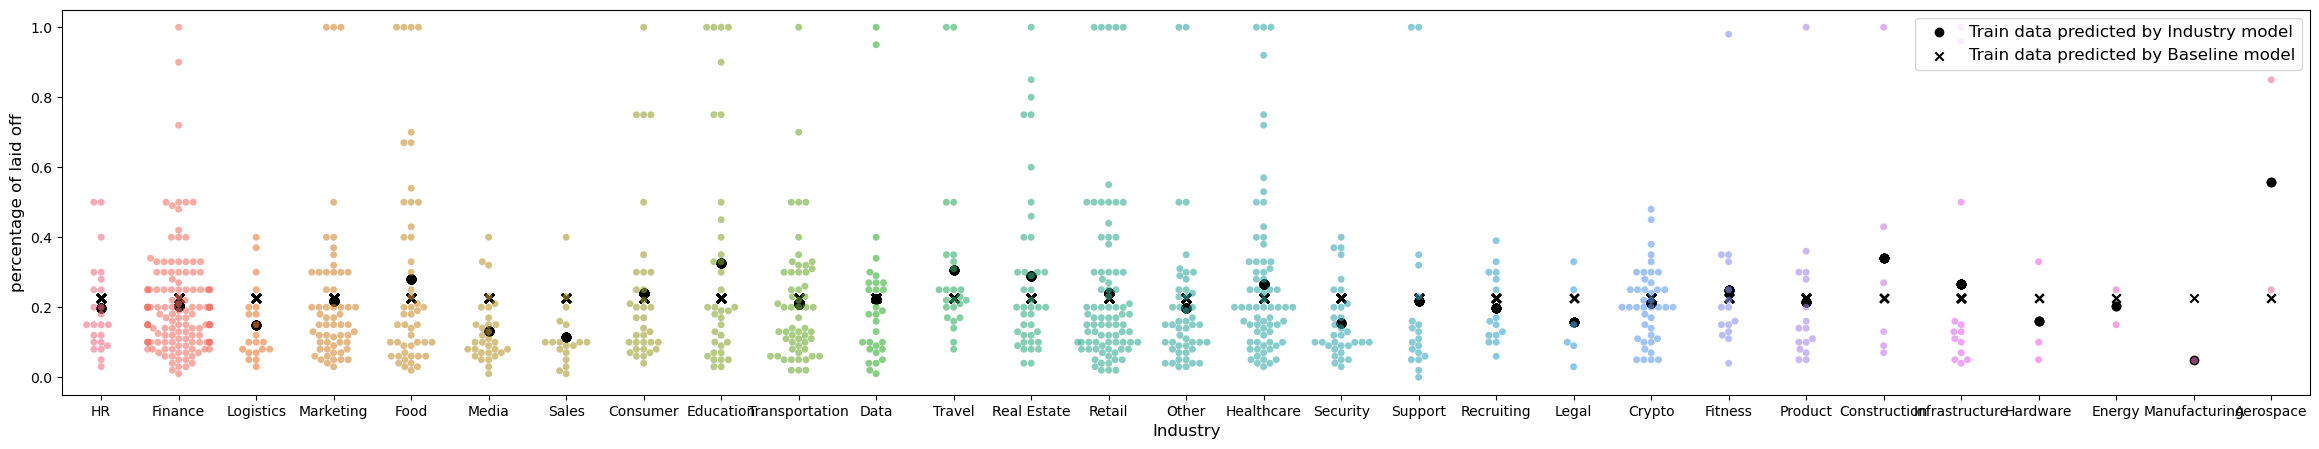

In [211]:
fig, ax = plt.subplots(figsize=(29,5))

plt.scatter(df_industry_lr1['industry'], df_industry_lr1['pred_industry_lr1'], c='black', marker='o', label="Train data predicted by Industry model")

plt.scatter(df_baseline2['industry'], df_baseline2['pred_baseline2'], c='black',  marker='x', label="Train data predicted by Baseline model")

sns.swarmplot(data=laidoff_train,
               x = 'industry',
               y = 'percentage_laid_off',
              hue='industry', alpha=0.6,
              legend=False)

plt.xlabel("Industry", fontsize=12)
plt.ylabel("percentage of laid off", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.show()

# Task 3: Decision Tree

      company       location        industry  total_laid_off  \
0         N26         Berlin         Finance            71.0   
2     Dropbox    SF Bay Area           Other           500.0   
3       Vroom  New York City  Transportation           120.0   
4  Greenhouse  New York City      Recruiting           100.0   
7    Megaport       Brisbane  Infrastructure            50.0   

   percentage_laid_off       date           stage        country  \
0                 0.04 2023-04-28        Series E  United States   
2                 0.16 2023-04-27        Post-IPO  United States   
3                 0.11 2023-04-27        Post-IPO  United States   
4                 0.12 2023-04-27  Private Equity  United States   
7                 0.16 2023-04-27        Post-IPO      Australia   

   funds_raised  year  
0        1700.0  2023  
2        1700.0  2023  
3        1300.0  2023  
4         110.0  2023  
7          98.0  2023  


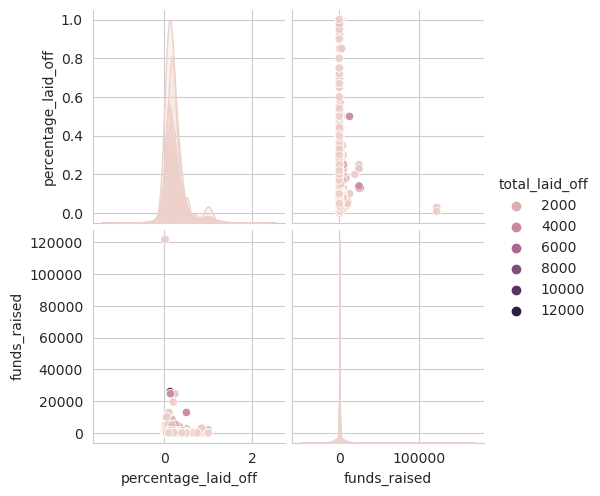

In [226]:
# Author: Shreya Saha
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

print(df.head())

sns.pairplot(data=data, hue='total_laid_off')
plt.show()

In [227]:
#split dataset in features and target variable
feature_cols = ['funds_raised']
X = df[feature_cols] # Features
y = df.total_laid_off # Target variable

In [228]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [229]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.030042918454935622


In [230]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.07296137339055794


The decision tree here only uses one feature, but it requires more characterization of mass layoff data and needs more work for an appropriate decision tree model. So, we expect the accuracy can be improved.

# Future work

We plan to compare directly with the other measurements. Then, we can build a similar predictive model to compare accuracy. 

- COVID data 
- stock market
- GDP
- Demographics
- Percent of workspace change (e.g., remote / hybrid / on-site)
- Funds raised 
- Effects of Artificial Intelligence, voluntary retirement and mental health

Lastly, we would like to put them into a platform that allows a employer to track their company's health as a mass layoff event would not help the growth of a company. 

Question 1: How does a global mass layoff vary from country to country? For example, GDP vs mass layoffs. How did the economy and company respond to the events (e.g., COVID, workspace change, stock market, tech expansion or global economy slowdown)?

Question 2: How does a user-friendly platform for predicting a mass layoff of a company help employees and employers?

Question 3: Would we see a swarm of mass layoffs clusters at some specific time window or correlates with some events?

Hopefully, you enjoy the jupyter notebook and let's fight for MASS LAYOFFs!! :)